# 베스트 모델 만들기 - 와인 사례
## 이진 분류
## 베스트 모델 업데이트하기 - 자동 중단, 그래프로 확인

In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [43]:
# 데이터 입력
df_pre = pd.read_csv('../dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [44]:
# 모델 설정
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_13 (Dense)             (None, 12)                372       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [45]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [46]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [47]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [48]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [49]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 0.37647, saving model to ./model/final001-0.3765.hdf5

Epoch 00002: val_loss improved from 0.37647 to 0.29493, saving model to ./model/final002-0.2949.hdf5

Epoch 00003: val_loss improved from 0.29493 to 0.27824, saving model to ./model/final003-0.2782.hdf5

Epoch 00004: val_loss improved from 0.27824 to 0.26325, saving model to ./model/final004-0.2633.hdf5

Epoch 00005: val_loss improved from 0.26325 to 0.25326, saving model to ./model/final005-0.2533.hdf5

Epoch 00006: val_loss improved from 0.25326 to 0.24087, saving model to ./model/final006-0.2409.hdf5

Epoch 00007: val_loss improved from 0.24087 to 0.23357, saving model to ./model/final007-0.2336.hdf5

Epoch 00008: val_loss improved from 0.23357 to 0.22856, saving model to ./model/final008-0.2286.hdf5

Epoch 00009: val_loss improved from 0.22856 to 0.22051, saving model to ./model/final009-0.2205.hdf5

Epoch 00010: val_loss improved from 0.22051 to 0.21297, saving model to ./model/final


Epoch 00107: val_loss did not improve from 0.09596

Epoch 00108: val_loss did not improve from 0.09596

Epoch 00109: val_loss improved from 0.09596 to 0.09350, saving model to ./model/final109-0.0935.hdf5

Epoch 00110: val_loss did not improve from 0.09350

Epoch 00111: val_loss did not improve from 0.09350

Epoch 00112: val_loss did not improve from 0.09350

Epoch 00113: val_loss did not improve from 0.09350

Epoch 00114: val_loss improved from 0.09350 to 0.09107, saving model to ./model/final114-0.0911.hdf5

Epoch 00115: val_loss did not improve from 0.09107

Epoch 00116: val_loss did not improve from 0.09107

Epoch 00117: val_loss did not improve from 0.09107

Epoch 00118: val_loss did not improve from 0.09107

Epoch 00119: val_loss did not improve from 0.09107

Epoch 00120: val_loss did not improve from 0.09107

Epoch 00121: val_loss improved from 0.09107 to 0.08771, saving model to ./model/final121-0.0877.hdf5

Epoch 00122: val_loss did not improve from 0.08771

Epoch 00123: val_


Epoch 00237: val_loss did not improve from 0.06040

Epoch 00238: val_loss did not improve from 0.06040

Epoch 00239: val_loss improved from 0.06040 to 0.05987, saving model to ./model/final239-0.0599.hdf5

Epoch 00240: val_loss improved from 0.05987 to 0.05964, saving model to ./model/final240-0.0596.hdf5

Epoch 00241: val_loss did not improve from 0.05964

Epoch 00242: val_loss did not improve from 0.05964

Epoch 00243: val_loss improved from 0.05964 to 0.05915, saving model to ./model/final243-0.0591.hdf5

Epoch 00244: val_loss improved from 0.05915 to 0.05905, saving model to ./model/final244-0.0591.hdf5

Epoch 00245: val_loss did not improve from 0.05905

Epoch 00246: val_loss improved from 0.05905 to 0.05866, saving model to ./model/final246-0.0587.hdf5

Epoch 00247: val_loss did not improve from 0.05866

Epoch 00248: val_loss did not improve from 0.05866

Epoch 00249: val_loss did not improve from 0.05866

Epoch 00250: val_loss improved from 0.05866 to 0.05852, saving model to .


Epoch 00379: val_loss did not improve from 0.05202

Epoch 00380: val_loss did not improve from 0.05202

Epoch 00381: val_loss did not improve from 0.05202

Epoch 00382: val_loss did not improve from 0.05202

Epoch 00383: val_loss did not improve from 0.05202

Epoch 00384: val_loss did not improve from 0.05202

Epoch 00385: val_loss did not improve from 0.05202

Epoch 00386: val_loss improved from 0.05202 to 0.05178, saving model to ./model/final386-0.0518.hdf5

Epoch 00387: val_loss did not improve from 0.05178

Epoch 00388: val_loss did not improve from 0.05178

Epoch 00389: val_loss did not improve from 0.05178

Epoch 00390: val_loss did not improve from 0.05178

Epoch 00391: val_loss did not improve from 0.05178

Epoch 00392: val_loss did not improve from 0.05178

Epoch 00393: val_loss improved from 0.05178 to 0.05135, saving model to ./model/final393-0.0514.hdf5

Epoch 00394: val_loss did not improve from 0.05135

Epoch 00395: val_loss did not improve from 0.05135

Epoch 00396: va


Epoch 00532: val_loss did not improve from 0.05017

Epoch 00533: val_loss did not improve from 0.05017

Epoch 00534: val_loss improved from 0.05017 to 0.05009, saving model to ./model/final534-0.0501.hdf5

Epoch 00535: val_loss did not improve from 0.05009

Epoch 00536: val_loss did not improve from 0.05009

Epoch 00537: val_loss did not improve from 0.05009

Epoch 00538: val_loss did not improve from 0.05009

Epoch 00539: val_loss did not improve from 0.05009

Epoch 00540: val_loss did not improve from 0.05009

Epoch 00541: val_loss did not improve from 0.05009

Epoch 00542: val_loss did not improve from 0.05009

Epoch 00543: val_loss did not improve from 0.05009

Epoch 00544: val_loss did not improve from 0.05009

Epoch 00545: val_loss did not improve from 0.05009

Epoch 00546: val_loss did not improve from 0.05009

Epoch 00547: val_loss did not improve from 0.05009

Epoch 00548: val_loss did not improve from 0.05009

Epoch 00549: val_loss did not improve from 0.05009

Epoch 00550: 

In [51]:
del model
model = load_model('model/final704-0.0501.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

NameError: name 'model' is not defined

In [52]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [53]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

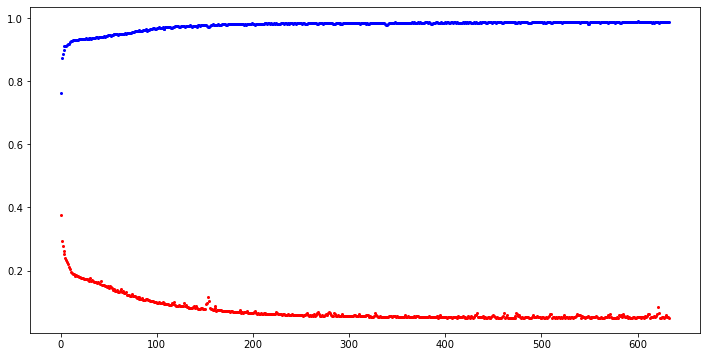

In [54]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()